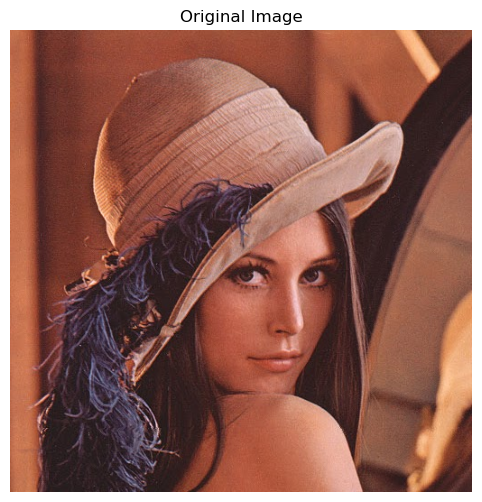

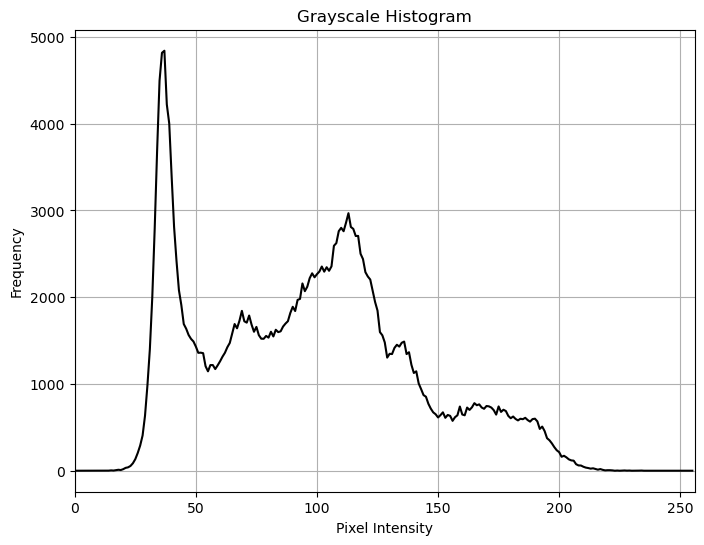

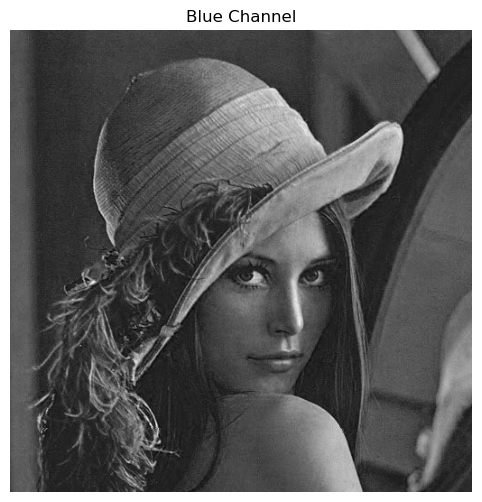

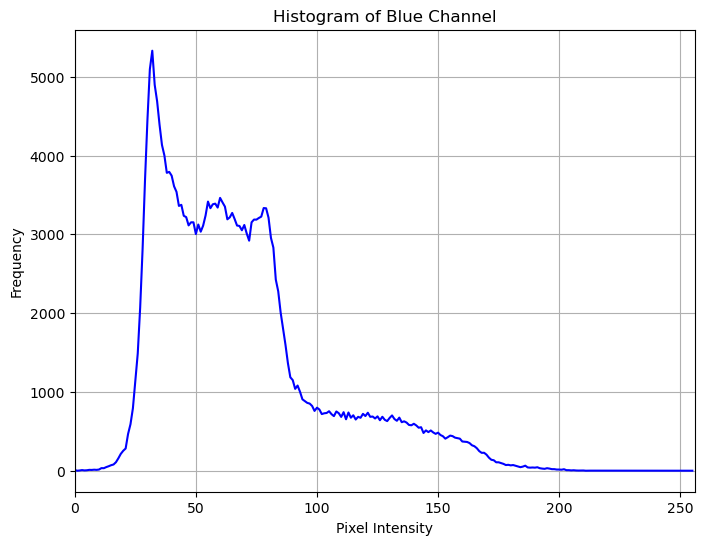

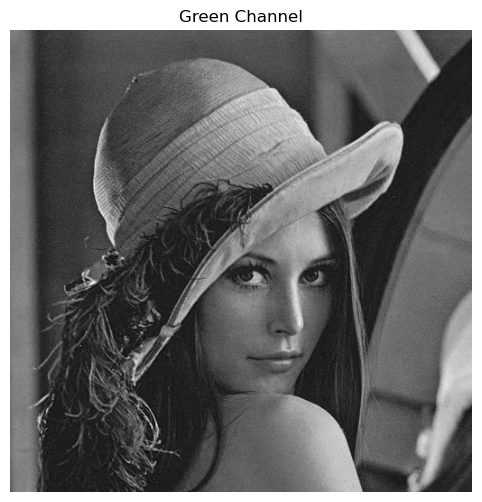

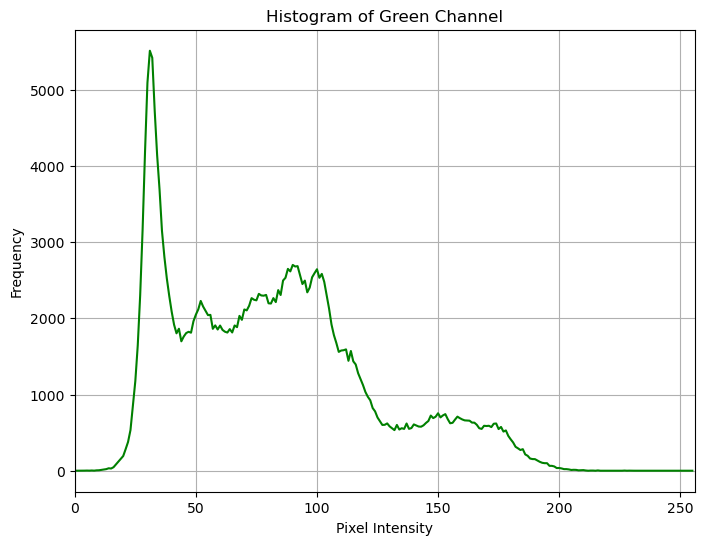

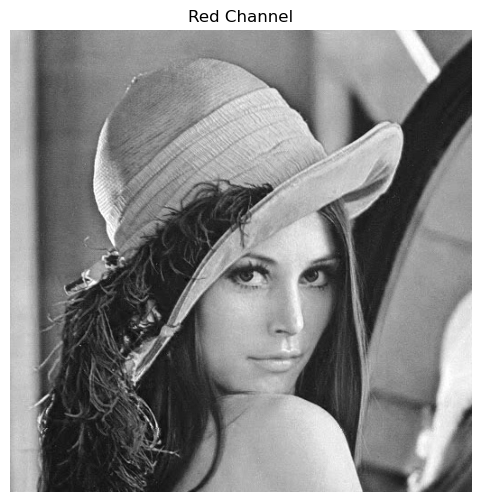

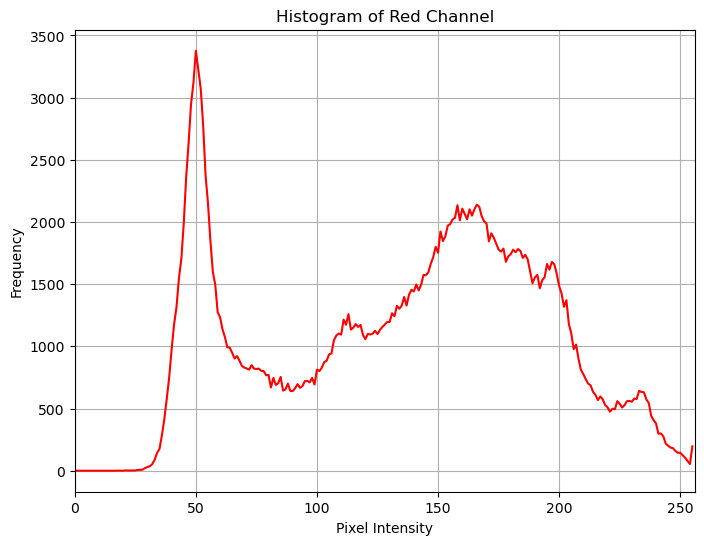

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_original_image(image):
    """
    Display the original image.
    
    Args:
        image: Input color image in BGR format.
    """
    # Convert the image from BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the original image
    plt.figure(figsize=(8, 6))
    plt.title("Original Image")
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()

def compute_gray_histogram(image):
    """
    Compute and display the histogram of a grayscale image.
    
    Args:
        image: Input color image in BGR format.
    """
    # Convert the color image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute the histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    
    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.plot(histogram, color='black')
    plt.xlim([0, 256])
    plt.grid()
    plt.show()

def compute_color_histogram_and_channels(image):
    """
    Compute and display the histograms of the R, G, and B channels separately,
    and show the individual channels.
    
    Args:
        image: Input color image in BGR format.
    """
    # Define color names and corresponding BGR channel indices
    colors = ('blue', 'green', 'red')
    channel_names = ['Blue Channel', 'Green Channel', 'Red Channel']
    
    # Split the image into its B, G, and R channels
    channels = cv2.split(image)
    
    # Display each channel
    for i, (channel, color, name) in enumerate(zip(channels, colors, channel_names)):
        plt.figure(figsize=(8, 6))
        plt.title(f"{name}")
        plt.imshow(channel, cmap='gray')
        plt.axis('off')
        plt.show()
        
        # Compute the histogram for the current channel
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
        
        # Plot the histogram
        plt.figure(figsize=(8, 6))
        plt.title(f"Histogram of {name}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.plot(histogram, color=color)
        plt.xlim([0, 256])
        plt.grid()
        plt.show()

# Define the image path using os.path.join
# This ensures that the image path is correctly formed regardless of the operating system
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Modify this with your image path
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Modify this with your image path
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'vegetation_image_1.jpeg')  # Modify this with your image path

# Load the image using OpenCV
# cv2.imread loads the image in BGR format by default (Blue-Green-Red)
image = cv2.imread(image_path)

if image is not None:
    # Display the original image
    show_original_image(image)
    
    # Call the functions to compute and display histograms and individual channels
    compute_gray_histogram(image)
    compute_color_histogram_and_channels(image)
else:
    print("Image not found. Please check the file path.")
